In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']

In [2]:
# import the dataset
data = pd.read_csv('CreditCard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing 

In [4]:
#check missing data 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Feature scaling

In [6]:
# check imbalance dataset
data['Class'].value_counts()



0    284315
1       492
Name: Class, dtype: int64

#Yes, there is an imbalance dataset. 


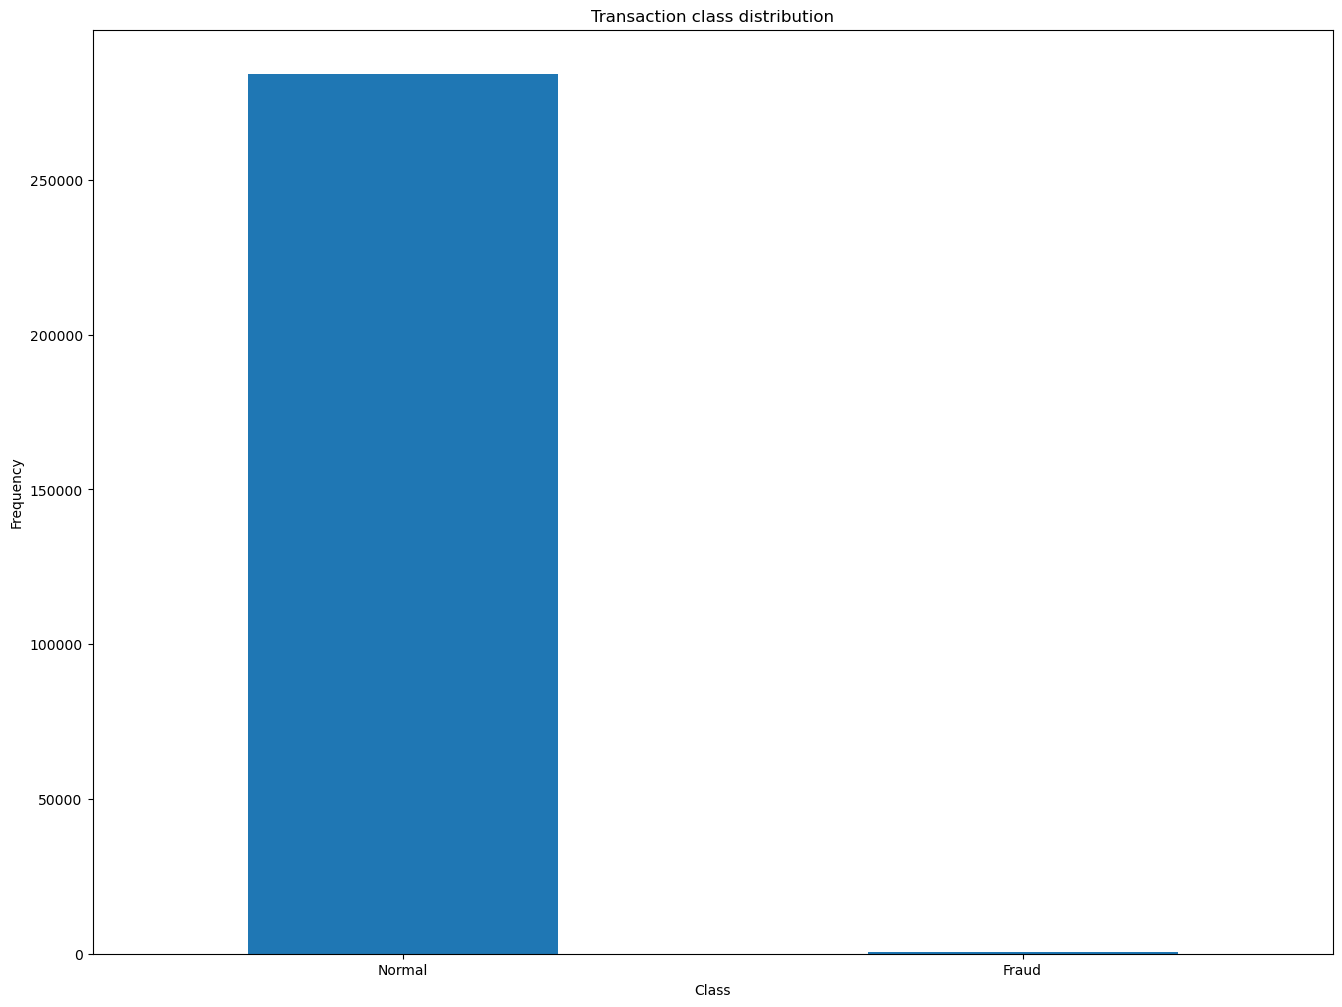

In [7]:
# EDA - Exploratory data analysis
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [8]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [9]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

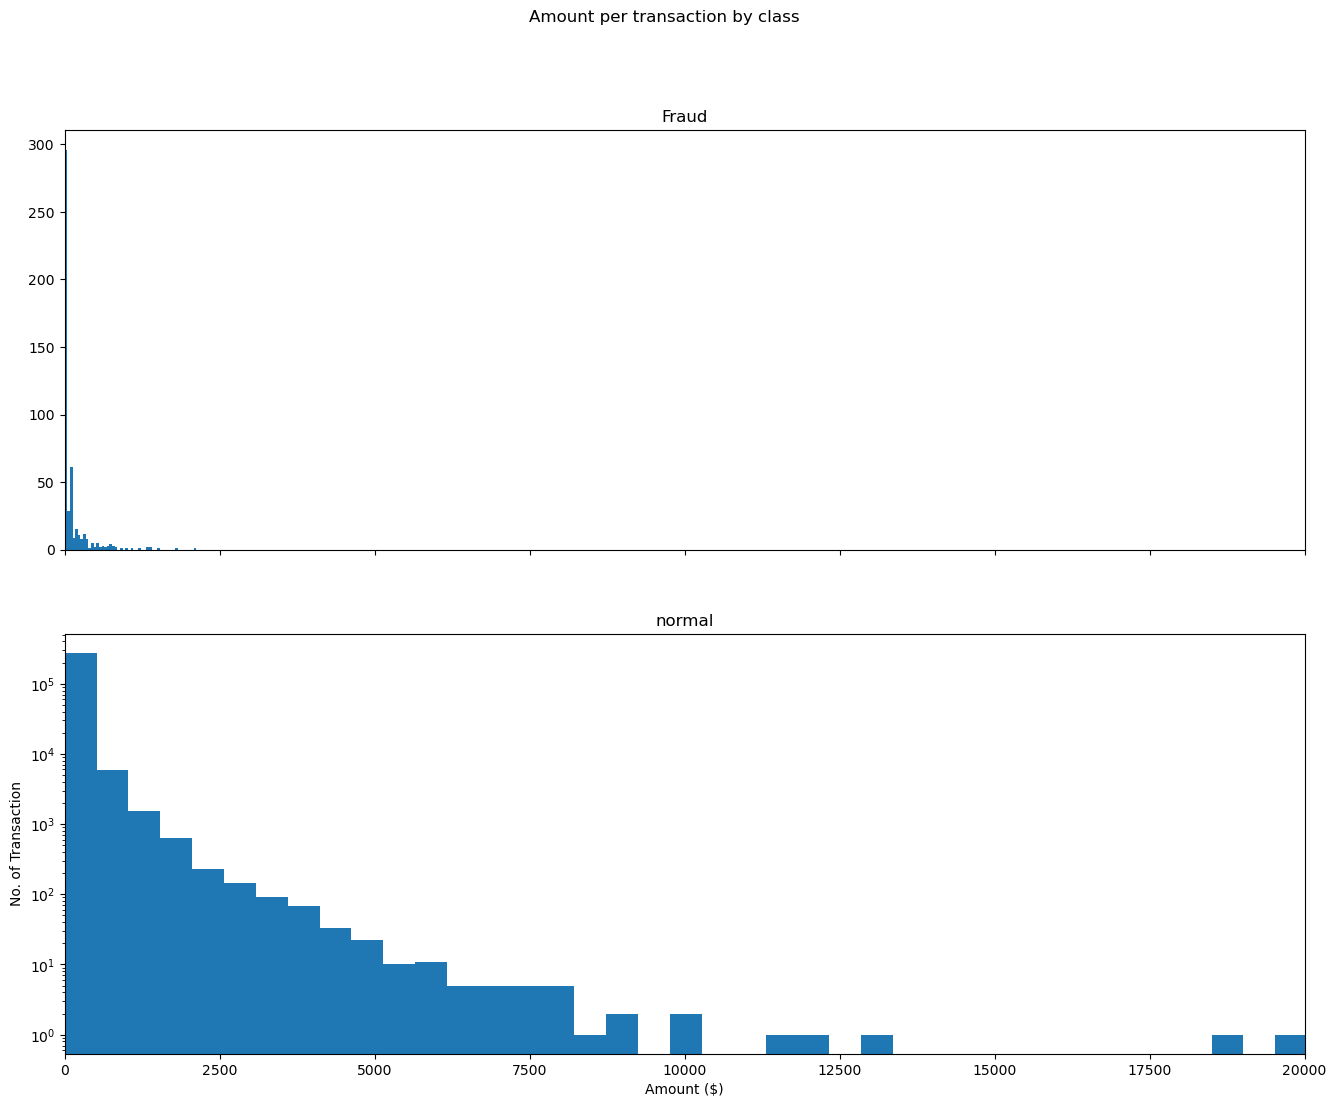

In [11]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

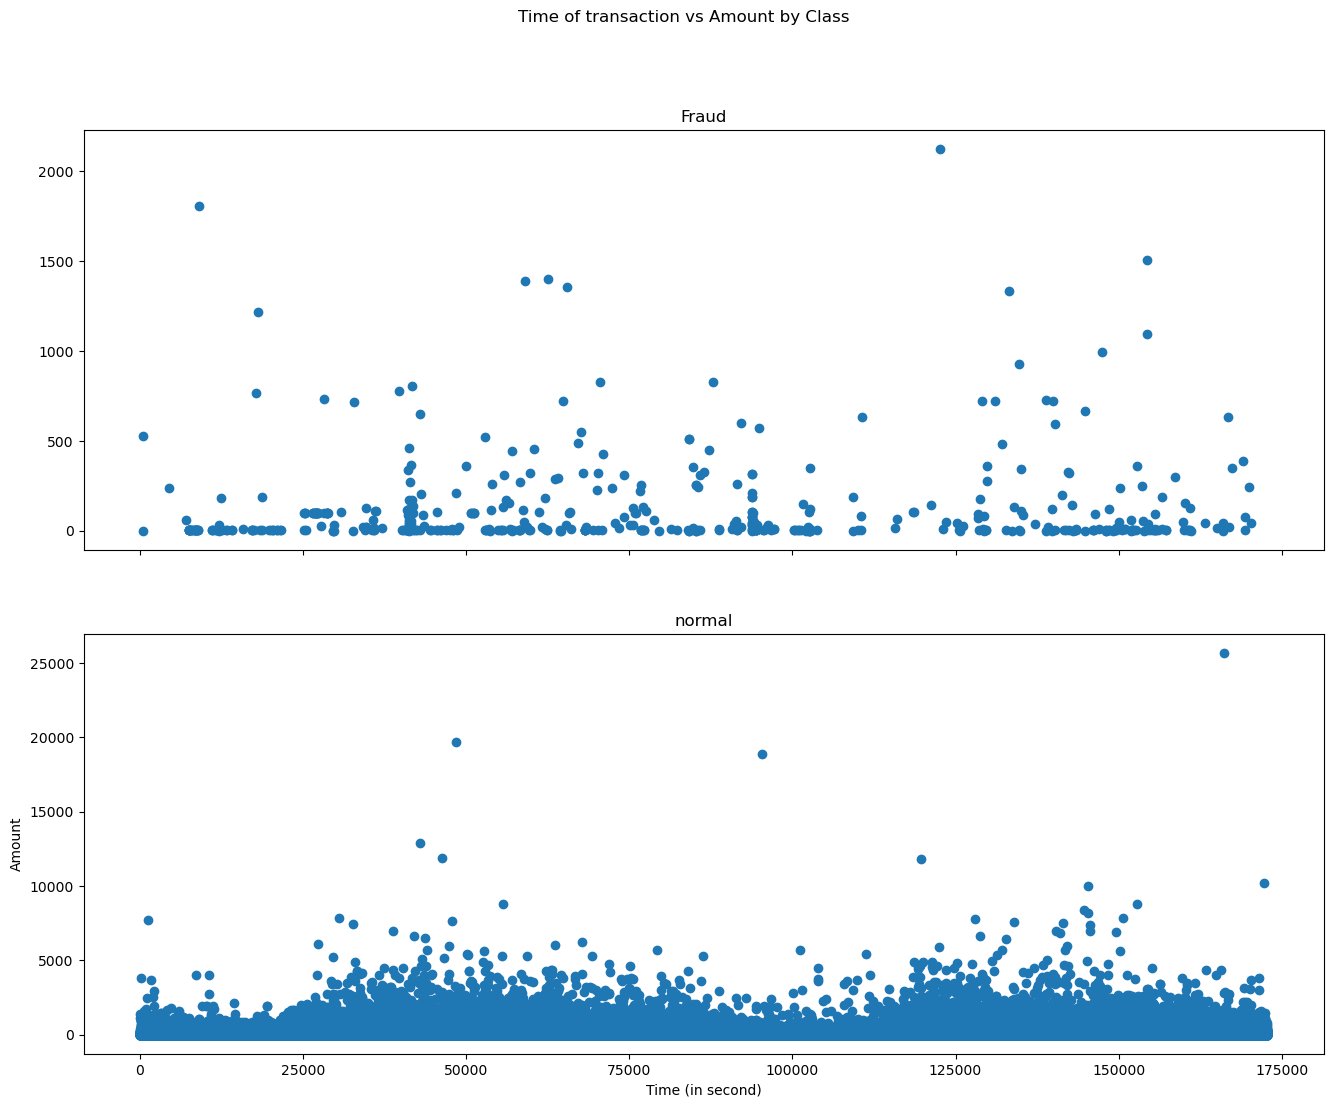

In [12]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in second)")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

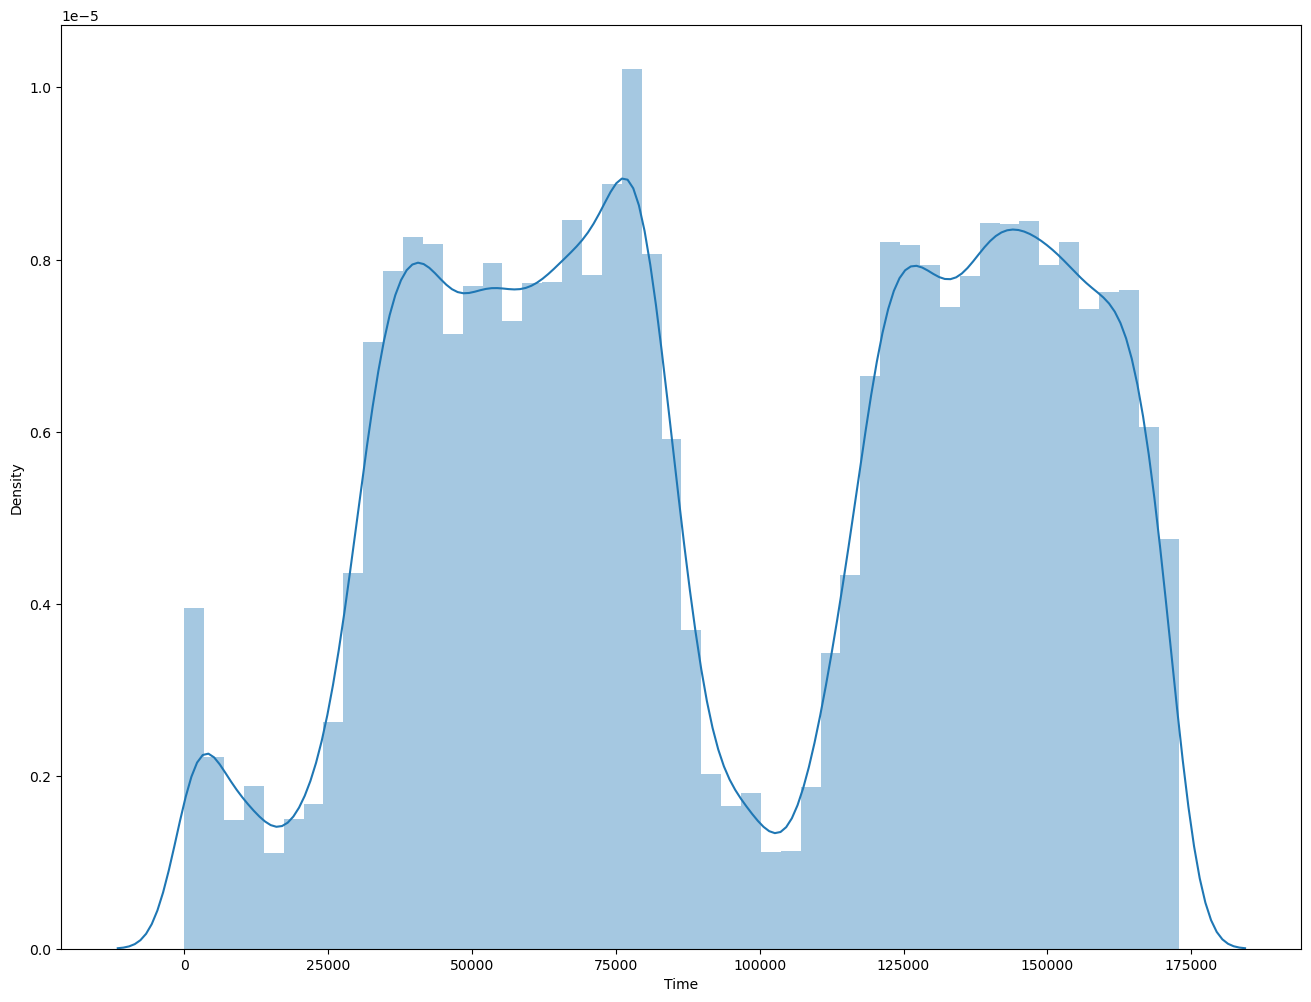

In [13]:
sns.distplot(data['Time'])

In [20]:
# taking 10% data only for building the model
# you have to do it by your own with the same method however take 100% dataset

In [14]:
data1 = data.sample(frac=0.1, random_state=1)
data1.shape

(28481, 31)

In [15]:
data1.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.52302,0.358468,...,-0.075208,0.045536,0.380739,0.02344,-2.220686,-0.201146,0.066501,0.22118,1.79,0


In [16]:
fraud = data1[data1['Class']==1]
valid = data1[data1['Class']==0]

In [17]:
print(fraud.shape)
print(valid.shape)

(49, 31)
(28432, 31)


In [20]:
#outlier_fraction = len(fraud)/float(len(valid))
outlier_fraction = 49 / (49+28432)

In [21]:
outlier_fraction

0.0017204452090867595

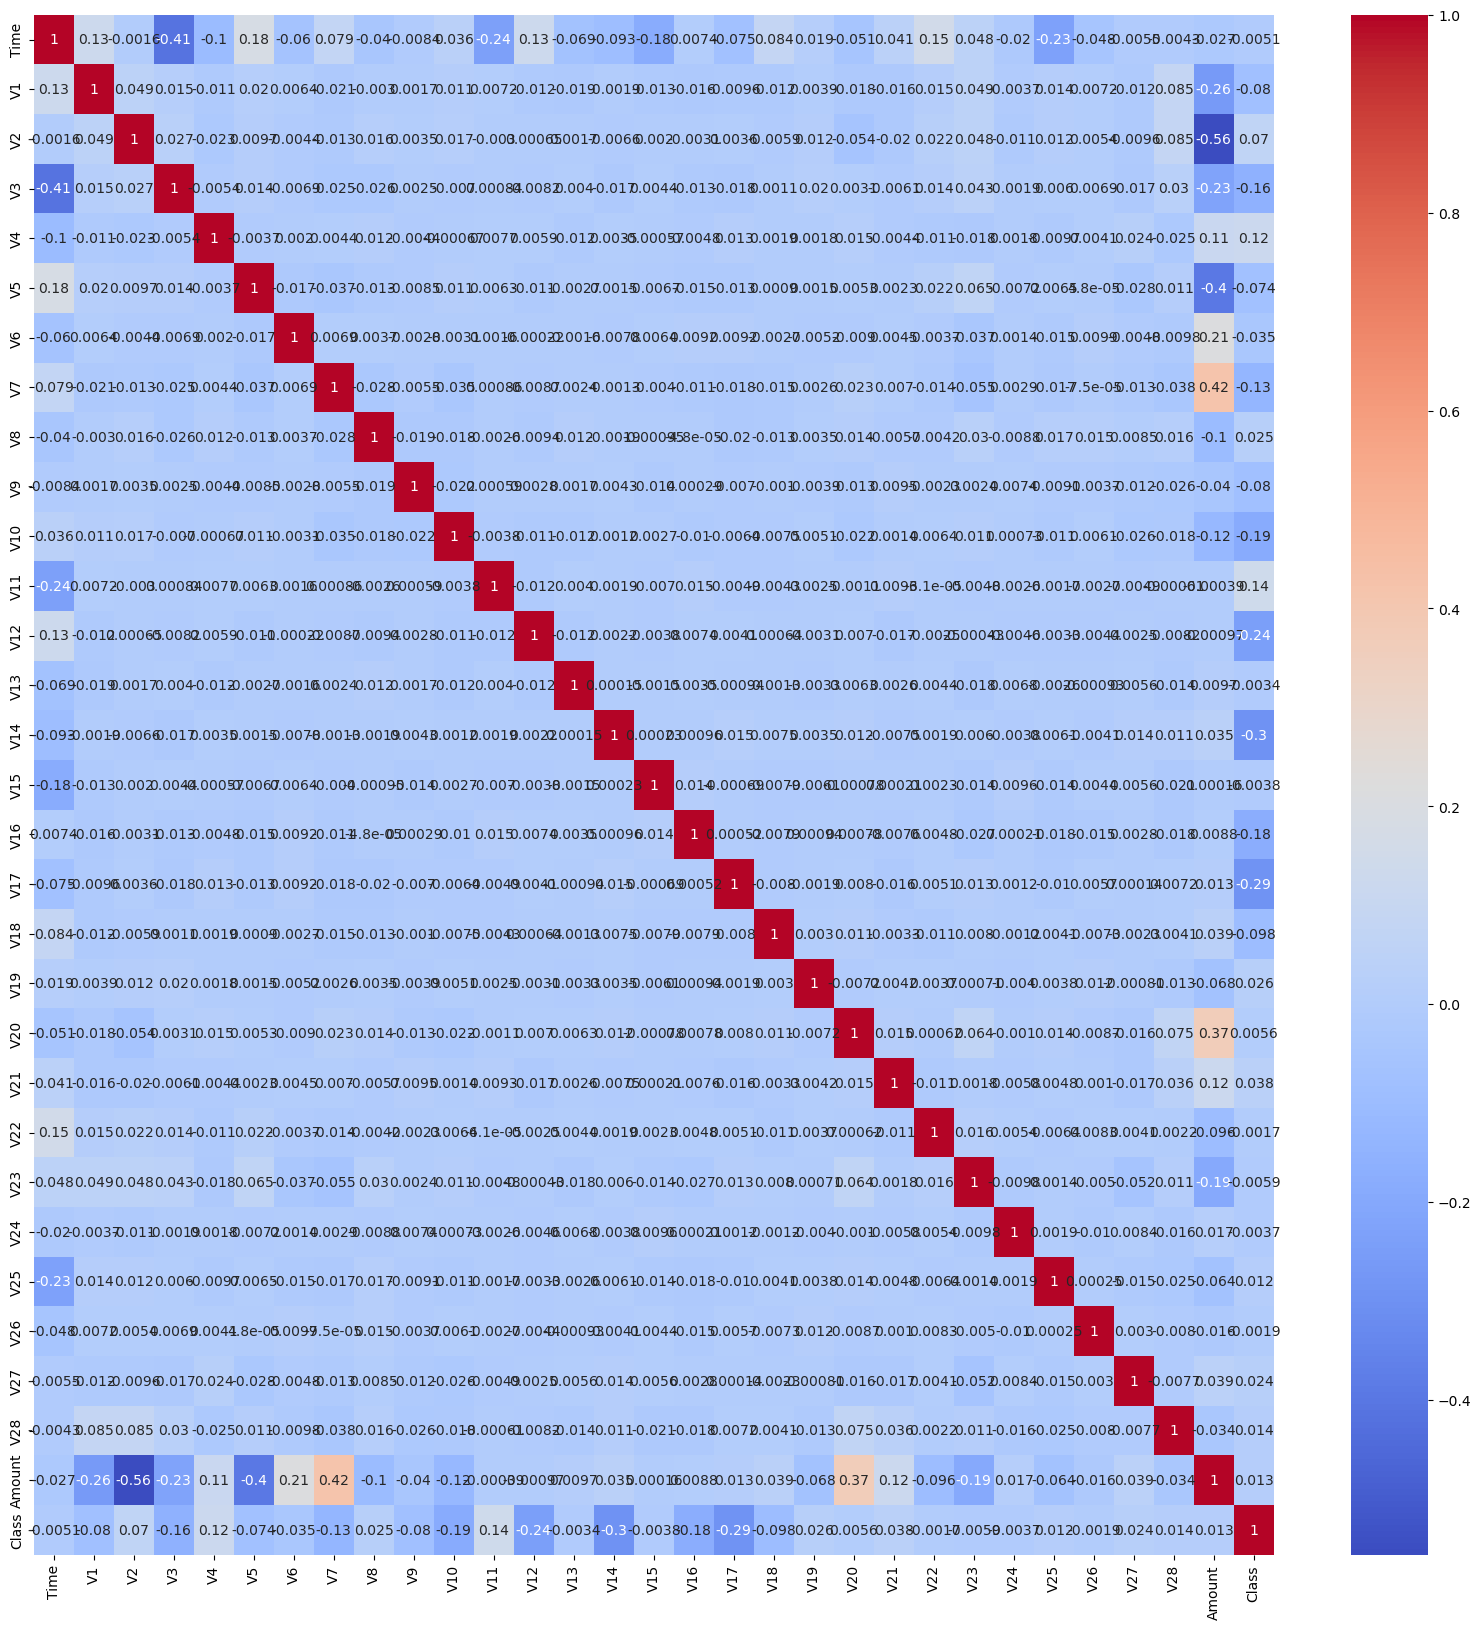

In [22]:
# Correlation part

# Heat Map
corrmat = data1.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data1[top_corr_feature].corr(), annot=True, cmap='coolwarm')

In [23]:
columns = data1.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [24]:
# split the data into target variable and feature variables

# x = data1iloc[:,0:31]
# x = data1.drop(['Class'], axis=1)
columns = [c for c in columns if c not in ['Class']]
target = 'Class'

In [32]:
target

'Class'

In [25]:
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
state = np.random.RandomState(101)
x = data1[columns]
y = data1[target]
x_outlier = state.uniform(low=0, high=1, size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


split the data into train and test for building the model and prediction

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=110)

In [27]:
x_train.shape

(19936, 30)

In [28]:
x_test.shape

(8545, 30)

# Build Model

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
print(classification_report(y_train, y_pred_train))

print("#########"*50)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       0.58      0.56      0.57        34

    accuracy                           1.00     19936
   macro avg       0.79      0.78      0.78     19936
weighted avg       1.00      1.00      1.00     19936

##################################################################################################################################################################################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.56      0.60      0.58        15

    accuracy                           1.00      8545
   m

In [37]:
print(confusion_matrix(y_train, y_pred_train))

print("#########"*10)

print(confusion_matrix(y_test, y_pred_test))

[[19888    14]
 [   15    19]]
##########################################################################################
[[8523    7]
 [   6    9]]


In [38]:
print(accuracy_score(y_train, y_pred_train))

print("#########"*10)

print(accuracy_score(y_test, y_pred_test))

0.9985453451043339
##########################################################################################
0.9984786424809831


In [39]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [41]:
print(accuracy_score(y_train, y_pred_dt_train))

print("#########"*10)

print(accuracy_score(y_test, y_pred_dt_test))

1.0
##########################################################################################
0.9987126974839087


In [42]:
from sklearn import tree

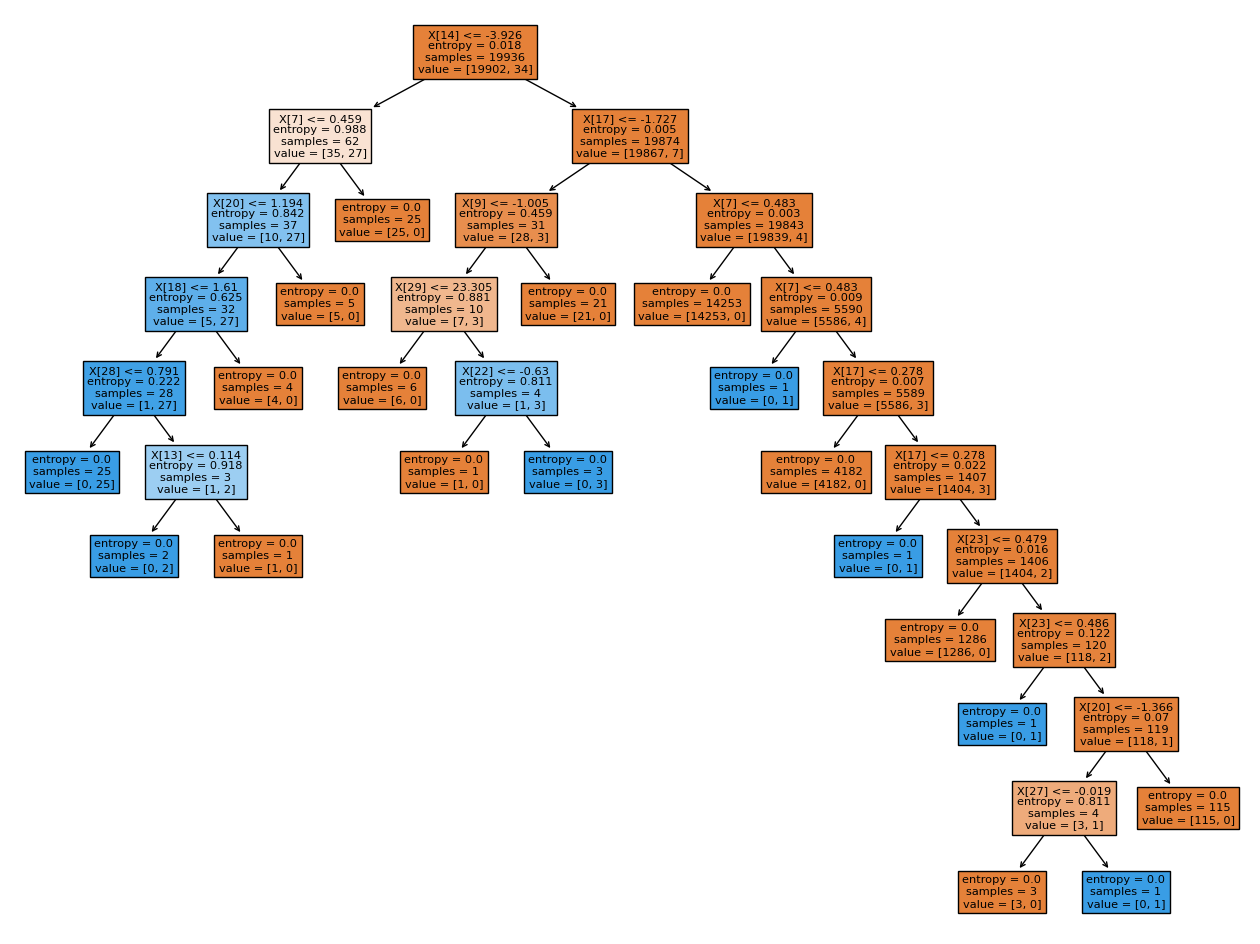

In [43]:
tree.plot_tree(dtree, filled=True)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [45]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [46]:
print(accuracy_score(y_train, y_pred_dt_train))

print("#########"*10)

print(accuracy_score(y_test, y_pred_dt_test))

1.0
##########################################################################################
0.9987126974839087


In [47]:
print(classification_report(y_train, y_pred_rfc_train))

print("#########"*10)

print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

##########################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       1.00      0.53      0.70        15

    accuracy                           1.00      8545
   macro avg       1.00      0.77      0.85      8545
weighted avg       1.00      1.00      1.00      8545



# XGBoost

In [53]:
#!pip install xgboost

In [48]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
y_pred_xgb_train = xgb_classifier.predict(x_train)
y_pred_xgb_test = xgb_classifier.predict(x_test)

In [50]:
print(accuracy_score(y_train, y_pred_xgb_train))

print("#########"*10)

print(accuracy_score(y_test, y_pred_xgb_test))

1.0
##########################################################################################
0.9991808074897601


In [51]:
print(classification_report(y_train, y_pred_xgb_train))

print("#########"*10)

print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

##########################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.90      0.60      0.72        15

    accuracy                           1.00      8545
   macro avg       0.95      0.80      0.86      8545
weighted avg       1.00      1.00      1.00      8545



In [58]:
# Stacking Classifier
# Local Outlier Factor
# Isolation Forest
# SVM

# Stacking Classifier

In [52]:
#!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00


In [53]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [54]:
from sklearn.model_selection import cross_val_score

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=clf4)

print('3-fold cross validation : \n')

for clf, label in zip([clf1, clf2, clf3,sclf], ['KNN','Naive Bayes Theorem', 'Random Forest',
                                               'Stacking Classifier']):
    scores = cross_val_score(clf, x, y, cv=3, scoring = 'accuracy')
    print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation : 

Accuracy : 1.00 (+/-0.00)[KNN]
Accuracy : 0.99 (+/-0.00)[Naive Bayes Theorem]
Accuracy : 1.00 (+/-0.00)[Random Forest]
Accuracy : 1.00 (+/-0.00)[Stacking Classifier]


In [55]:
# IsolationForest, LocalOutlierFactor

from sklearn.ensemble import IsolationForest

from sklearn.neighbors import LocalOutlierFactor

from sklearn.svm import OneClassSVM

In [56]:
LocalOutlierFactor()

LocalOutlierFactor()

In [57]:
Classification = {"Isolation Forest" : IsolationForest(n_estimators=100,max_samples=len(x),
                                                   contamination =outlier_faction),
                                                       
                                                       
                "Local Outlier Factor" : LocalOutlierFactor(n_neighbors=20, 
                                                            contamination=outlier_faction),
                 
                 "One Class SVM" : OneClassSVM()}

In [58]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="One Class SVM" :
        clf.fit(x)
        y_pred = clf.predict(x)
        
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1]= 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=y).sum()
    
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y, y_pred))
    print("Classification Report :")
    print(classification_report(y, y_pred))

Isolation Forest : 74
Accuracy Score :
0.9974017766230119
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor : 96
Accuracy Score :
0.9966293318352586
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

One Class SVM : 14238
Accuracy Score :
0.5000877778167901
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50      0.